In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

%matplotlib inline 
plt.rcParams["figure.figsize"] = (20,10)

Text(0.5, 1.0, 'Data V/S Probabilty Density')

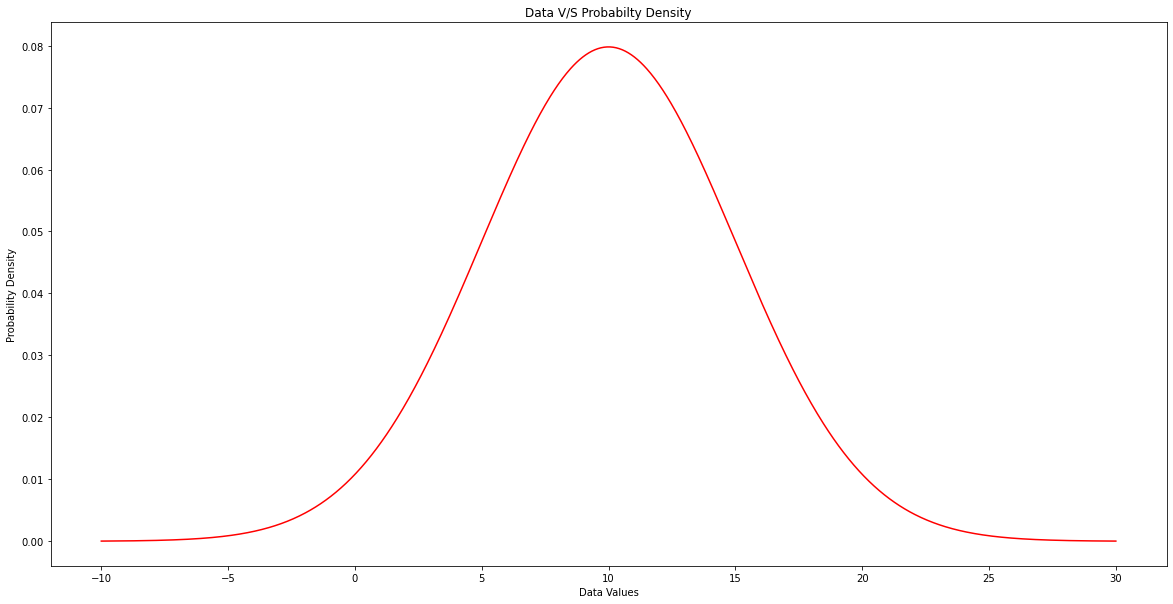

In [2]:
fig , ax = plt.subplots(1)
data = np.random.normal(10,5,50) ##GEnerates 50 samples of Data from a Normal Distribution with Mean 10 and S.D 5

r_data = np.linspace(10-4*5,10+4*5,1000)##Gives 1000 equally spaced points from 10-4*5 to 10+4*5

##Plots the datapoint and its probability density 
ax.plot(r_data, 1/(5 * np.sqrt(2 * np.pi)) *np.exp( - (r_data - 10)**2 / (2 * 5**2) ), color='r')
ax.set_xlabel('Data Values')
ax.set_ylabel('Probability Density')
ax.set_title('Data V/S Probabilty Density')
print()

````{div} full-width
````
## Derivation of Maximum Likelihood Estimate(MLE) for a Normal Distribution <br><br>

$\large{\text{ Probability Density Function (PDF) of Normal Distribution :  }}$ <br><br>

$$\large{f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}}$$ <br><br>

$\large{\text{ Suppose we have } n \text{ independently and identically distributed observations as } x_{1},x_{2},\dots,x_{n}}$ $\large{\text{ from a Normal Distribution } \mathcal{N}(\mu,\,\sigma^{2}) }$ <br><br>

$\large{\text{ As they are independent, Likelihood  given } \mu \text{ and } \sigma \text{ is }}$ <br><br>


$$\large{\begin{align}
L(x_{1},x_{2},\dots,x_{n}|\sigma,\mu)&=\prod_{i=1}^{n}\frac{1}{\sigma\sqrt{2\pi}} \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma^{2}} \bigl({x_{i} - \mu } \bigr)^{2} \mathbf{\Bigg\}}\\ \\
&=\Biggl(\frac{1}{\sigma\sqrt{2\pi}}\Biggr)^{n} \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma^{2}} \sum_{i=1}^{n}\bigl({x_i - \mu} \bigr)^2 \mathbf{\Bigg\}} \\\\
&\propto \mathbf{exp \Bigg\{} -\frac{1}{2\sigma^{2}} \sum_{i=1}^{n}\bigl({x_i ^ 2  + \mu ^ 2 - 2 x_i \mu } \bigr)\mathbf{\Bigg\}} \\\\
&= \mathbf{exp \Bigg\{} -\frac{1}{2\sigma^{2}} \left(\sum_{i=1}^{n}x_i ^ 2  + n \mu ^ 2 - 2 n \bar{x} \mu  \right)\mathbf{\Bigg\}} \\\\
&= \mathbf{exp \Bigg\{} -\frac{n}{2\sigma^{2}} \left(\mu ^ 2 - 2 \bar{x} \mu + \frac{1}{n} \sum_{i=1}^{n}x_i ^ 2 \right)\mathbf{\Bigg\}} \ldots\ldots (1) \\\\
\end{align}}$$
<br><br>

$\large {\text{ As we know Likelihood is also Normal, equation in form of } \mu_{MLE} \text{ and } \sigma_{MLE} \text{ is }}$
<br><br>

$$\large{\begin{align}
&=\Biggl(\frac{1}{\sigma_{MLE}\sqrt{2\pi}}\Biggr) \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{MLE}^{2}} \bigl({\mu - \mu_{MLE}} \bigr)^2 \mathbf{\Bigg\}} \\\\
&\propto \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{MLE}^{2}} \bigl({\mu - \mu_{MLE}} \bigr)^2 \mathbf{\Bigg\}} \\\\
&= \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{MLE}^{2}} \bigl({\mu ^ 2  + \mu_{MLE} ^ 2 - 2 \mu \mu_{MLE} } \bigr)\mathbf{\Bigg\}}\ldots\ldots (2) \\\\
\end{align}}$$
<br><br>

$\large{\text{Comparing (1) and (2) , we get  } \mu_{MLE} \text{ and } \sigma_{MLE} \text{ as } }$
<br><br>

$$\large{\mu_{MLE} = \bar{x}}$$<br><br>
$$\large{\sigma_{MLE} = \frac{\sigma}{\sqrt{n}}}$$ <br><br>




### $$L \sim \mathcal{N}(\mu_{MLE},\,\sigma_{MLE}^{2}) $$



In [3]:
###Function to Calculate Probability Density given a point x, Mean and Standard Deviation

def normcalc(x,mu,std):
    
    return(1/(std * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * std**2)))

In [4]:
mu_likelihood = np.mean(data) ##Calculates MLE Mean using formula derived above
std_likelihood = np.sqrt(25/50) ## Calculates MLE Standard Deviation using formula derived above

mu_space1 = np.linspace(mu_likelihood - 4* std_likelihood,mu_likelihood + 4* std_likelihood,1000) ##Gives 1000 equally spaced points from mu_likelihood - 4* std_likelihood to mu_likelihood + 4* std_likelihood
likelihood=[] ##List to store Probability density of mu with respect to likelihood
for i in mu_space1:
    likelihood.append(normcalc(i,mu_likelihood,std_likelihood))##Calculates Probability Density of mu using MLE

mu_space2 = np.linspace(25-4*5,25+4*5,1000) ##Gives 1000 equally spaced points from 25 - 4*5 to 25 + 4*5
prior =[] ##List to store Probability density of mu with respect to prior 
for i in mu_space2:
    prior.append(normcalc(i,25,5)) ##Calculates Probability Density of mu using prior parameters
 


````{div} full-width
````
## Derivation of Maximum a Posteriori (MAP) Estimate for a Normal Distribution<br><br>

$\large{Prior \sim \mathcal{N}(\mu_{0},\,\sigma_{0}^{2}) }$ <br><br>
$\large{\text{ Suppose we have } n \text{ independently and identically distributed observations as } x_{1},x_{2},\dots,x_{n}}$ $\large{\text{ from a Normal Distribution } \mathcal{N}(\mu,\,\sigma^{2}) }$ <br><br>

$\large{\text {Then Posterior (} \mathbf{P}) \text{ is } }$

$$\large{\mathbf{P}  }$$

$$\large{\begin{align}
\mathbf{P} &\propto \mathbf{L} * \mathbf{Prior} \\\\
&= \frac{1}{\sqrt{2\pi\sigma_{0}^2}} \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{0}^{2}} \bigl({\mu - \mu_{0} } \bigr)^{2} \mathbf{\Bigg\}} * \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^2}} \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma^{2}} \bigl({x_{i} - \mu } \bigr)^{2} \mathbf{\Bigg\}} \\\\
&= \frac{1}{{(2\pi)}^{\frac{(n+1)}{2}} \sqrt{\sigma_{0}^2 \sigma^{2n}}} \quad \mathbf{exp \Bigg\{} \frac{-\mu^2 + 2\mu\mu_{0} - \mu_{0}^2}{2\sigma_{0}^{2}} - \sum_{i=1}^{n} \frac {x_{i} ^2 - 2\mu x_{i} + \mu^2}{2\sigma^2}\mathbf{\Bigg\}} \\\\
&\propto \mathbf{exp \Bigg\{}  \frac{-\mu^2(\sigma^2 + n \sigma_{0}^2) + 2\mu (\mu_{0} \sigma^2 + \sigma_{0}^2 x_{1} + \dots + \sigma_{0}^2 x_{n})- (\mu_{0}^2 \sigma^2 + \sigma_{0}^2 x_{1}^2 + \dots + \sigma_{0}^2 x_{n}^2 )}{2\sigma_{0}^2 \sigma^2}   \mathbf{\Bigg\}} \\\\
&\propto \mathbf{exp \Bigg\{} \frac{-\mu^2 + 2\mu \frac{\mu_{0} \sigma^2 + \sum_{i=1}^{n} \sigma_{0}^2 x_{i}}{\sigma^2 + n\sigma_{0}^2} - \left(  \frac{\mu_{0} \sigma^2 + \sum_{i=1}^{n} \sigma_{0}^2 x_{i}}{\sigma^2 + n\sigma_{0}^2} \right)^2}{2 \frac{\sigma_{0}^2 \sigma^2}{\sigma^2 + n\sigma_{0}^2}}  \mathbf{\Bigg\}} * \mathbf{exp \Bigg\{}  - \frac{\mu_{0} \sigma^2 + \sum_{i=1}^{n} \sigma_{0}^2 x_{i}^2}{2\sigma_{0}^2 \sigma^2}  \mathbf{\Bigg\}}\\\\
&\propto \mathbf{exp \Bigg\{}  - \frac{\left( \mu -  \frac{\mu_{0} \sigma^2 + \sum_{i=1}^{n} \sigma_{0}^2 x_{i}}{\sigma^2 + n\sigma_{0}^2} \right)^2}{2 \frac{\sigma_{0}^2 \sigma^2}{\sigma^2 + n\sigma_{0}^2}}   \mathbf{\Bigg\}} \ldots \dots (1) \\\\
\end{align}}$$
<br><br>

$\large {\text{ As we know Posterior is also Normal, equation in form of } \mu_{MAP} \text{ and } \sigma_{MAP} \text{ is }}$
<br><br>

$$\large{\begin{align}
&=\Biggl(\frac{1}{\sigma_{MAP}\sqrt{2\pi}}\Biggr) \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{MAP}^{2}} \bigl({\mu - \mu_{MAP}} \bigr)^2 \mathbf{\Bigg\}} \\\\
&\propto \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{MAP}^{2}} \bigl({\mu - \mu_{MAP}} \bigr)^2 \mathbf{\Bigg\}} \ldots\ldots (2)  \\\\
\end{align}}$$
<br><br>


$\large{\text{Comparing (1) and (2) , we get  } \mu_{MAP} \text{ and } \sigma_{MAP} \text{ as } }$
<br><br>



$$\large{\begin{align}
\sigma_{MAP}^2 &= \frac{\sigma^2 \sigma_{0}^2}{\sigma^2 + n\sigma_{0}^2} \\\\
&= \frac {1}{\sigma_{0}^{-2} + n\sigma^{-2}}  \\\\
&= \biggl(\frac{1}{\sigma_{0}^2} + \frac{n}{\sigma^2}\biggr)^{-1}
\end{align}}$$
<br><br>

$$\large{\sigma_{MAP} = \sqrt{\biggl(\frac{1}{\sigma_{0}^2} + \frac{n}{\sigma^2}\biggr)^{-1}}} $$<br><br>

$$\large{\begin{align}
\mu_{MAP} &= \frac{\mu_{0} \sigma^2 + \sum_{i=1}^{n} \sigma_{0}^2 x_i}{\sigma^2 + n\sigma_{0}^2} \\\\
&= \frac{\mu \sigma_{0}^{-2} + \sum_{i=1}^{n}  x_i \sigma^{-2}}{\sigma_{0}^{-2} + n\sigma^{-2}} \\\\
&= \sigma_{MAP}^2 \left(  \mu_{0} \sigma_{0}^{-2} + \sum_{i=1}^{n} x_i \sigma^{-2}  \right) \\\\
&= \sigma_{MAP}^2 \left(\frac{\mu_{0}}{\sigma_{0}^2} +  \frac{n\bar{x}}{\sigma^2}\right) \\\\
\end{align}}$$
<br><br>




### $$\mathbf{P} \sim \mathcal{N}(\mu_{MAP},\,\sigma_{MAP}^{2}) $$


Text(0.5, 1.0, 'Mean V/S Probabilty Density')

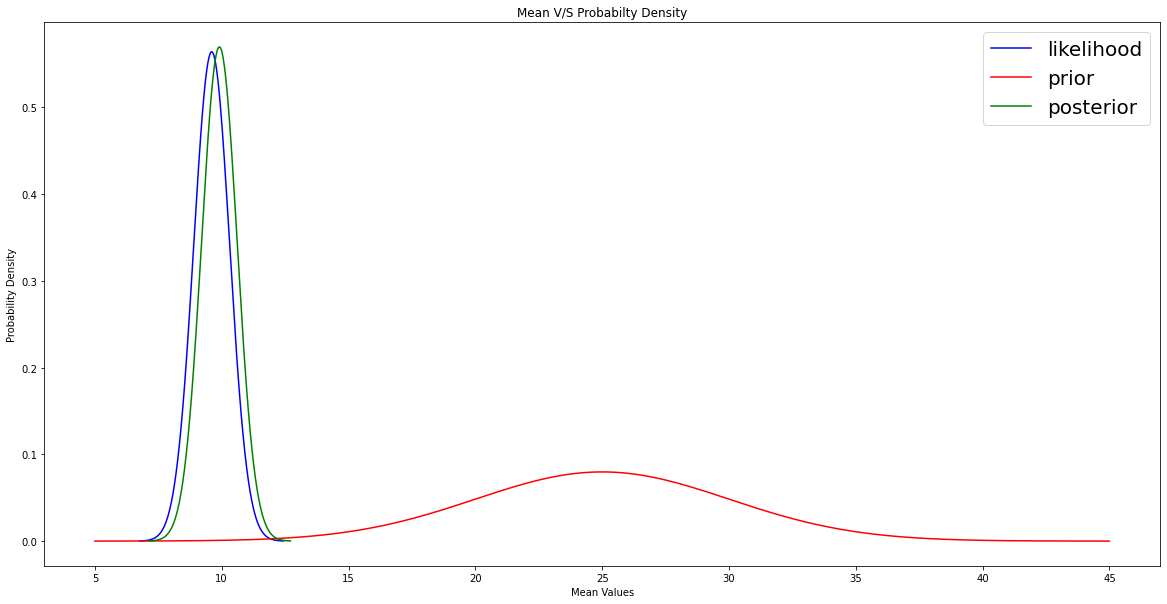

In [5]:
fig , ax = plt.subplots(1)

std_posterior = np.sqrt(1 / ((1/25) + (1/(25/50)))) ##Calculates MAP Standard Deviation using  formula derived above
mu_posterior = (std_posterior**2)*((25/25) + (mu_likelihood*50/25)) ##Calculates MAP Mean using formula derived above


mu_space3 = np.linspace(mu_posterior - 4* std_posterior,mu_posterior + 4* std_posterior,1000) ##Gives 1000 equally spaced points from mu_posterior - 4* std_posterior to mu_posterior + 4* std_posterior
posterior = [] ##List to store Probability density of Mean with respect to Posterior parameters
for i in mu_space3:
    posterior.append(normcalc(i,mu_posterior,std_posterior)) ##Probability density of Mean with respect to Posterior parameters

##Plots PDF of Likelihood , Prior and Posterior
ax.plot(mu_space1,likelihood, color = 'b',label= 'likelihood')
ax.plot(mu_space2,prior , color = 'r', label = 'prior')
ax.plot(mu_space3,posterior, color = 'g' , label = 'posterior')
ax.legend(loc = 'upper right' , prop = {'size' : 20})
ax.set_xlabel('Mean Values')
ax.set_ylabel('Probability Density')
ax.set_title('Mean V/S Probabilty Density')
print()

In [6]:

###Function to Perform MCMC Sampling using Metropolis-Hastings Algorithm. takes parameter as initial random mean ,S.D and threshold value k

def mcmc(mu,sigma,k):
    
    current_mu = mu ##Initializes Current_mu to passed initial mean value
    proposed_posterior = [current_mu] ##Adds passed mean as first accepted poiint of posterior
    count = 0 ##Used to keep track of no of consecuitve iterations where mean has  changed by less than 0.0001
    old_mean = 0 ##used to keep track of previous mean of posterior

    while(True):
        proposed_mu = np.random.normal(current_mu,sigma)##Generates a new proposal mean from a normal distribution dependent only on current mean and S.D passed earlier
        
        curr_prob = normcalc(current_mu,mu_likelihood,std_likelihood) * normcalc(current_mu,25,5) ##Computes Probability of Current Mean Representing our Data
        proposed_prob = normcalc(proposed_mu,mu_likelihood,std_likelihood) * normcalc(proposed_mu,25,5)##Computes Probability of Proposed Mean Representing our Data
        
        r = proposed_prob/curr_prob ## Computes ratio 
        
        if r > np.random.uniform(0,1):  ##If ratio computed is gretaer than a random float value between 0 and 1 then proposed mean is accepted and its value is given to current mean
            current_mu = proposed_mu
        proposed_posterior.append(current_mu)
        
        if(np.abs(old_mean - np.mean(proposed_posterior)) < 0.0001): ##Checks whether Mean of Posterior has changed by less than 0.0001
            count+=1   ##if yes then count is increemented by 1
        else:
            count = 0  ##Else count is set to 0
        
        old_mean = np.mean(proposed_posterior) ##Old mean is set to mean of updated posterior value list
        
        if(count>k): ##If count is greater than threshold K passed then loop terminates signifying Convergence of Histogram
            break
    
    return proposed_posterior ##Returns Posterior List

Text(0.5, 1.0, 'Mean V/S Probabilty Density')

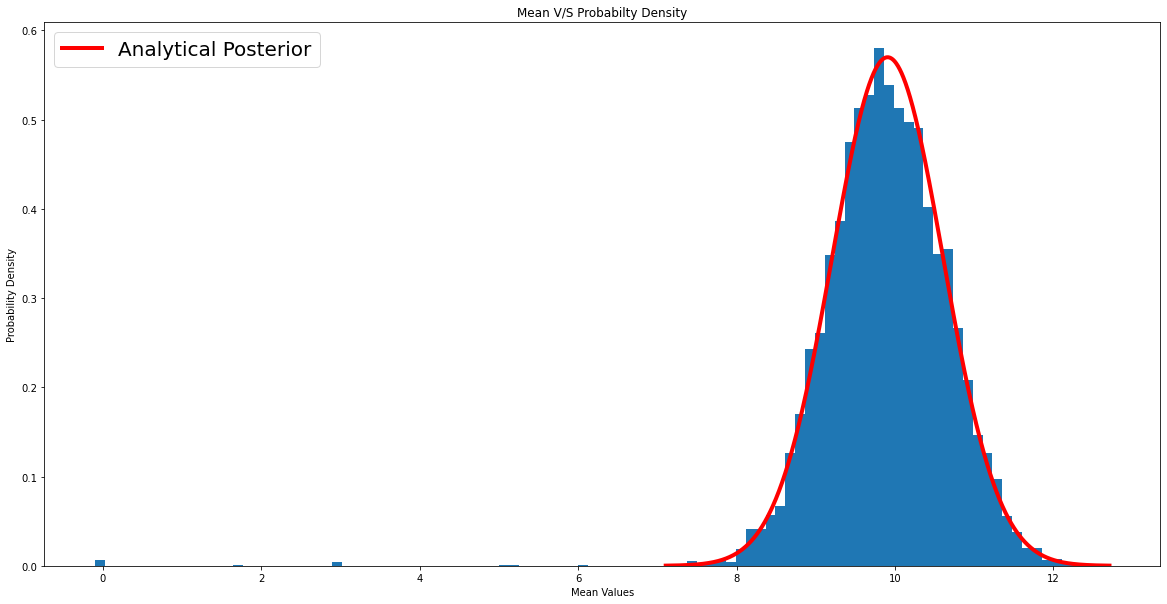

In [7]:
fig , ax = plt.subplots(1)

proposal_posterior = mcmc(0,1,100) ##Approximates the posterior using mean = 0 , S.D = 1 and threshold (k) = 100 as parameters

ax.hist(proposal_posterior,bins=100,density = True) ##Plots the Posterior points and thier density as a Histogram

ax.plot(mu_space3,posterior, color = 'r' , label = 'Analytical Posterior',linewidth = 4)##Plots the Analytical Posterior or Posterior calculaed previously using MAP estimates
ax.legend(loc = 'upper left' ,prop = {'size' : 20})

ax.set_xlabel('Mean Values')
ax.set_ylabel('Probability Density')
ax.set_title('Mean V/S Probabilty Density')
print()

Sorted Convergence Time : 
Convergence Time for Width 14.5 is 0.2967350482940674
Convergence Time for Width 12.5 is 0.5991222858428955
Convergence Time for Width 14.0 is 1.141986608505249
Convergence Time for Width 15.0 is 1.1938250064849854
Convergence Time for Width 9.0 is 1.214580774307251
Convergence Time for Width 13.5 is 1.2757654190063477
Convergence Time for Width 13.0 is 1.333303689956665
Convergence Time for Width 11.5 is 1.3794317245483398
Convergence Time for Width 12.0 is 1.5909647941589355
Convergence Time for Width 7.5 is 1.8744606971740723
Convergence Time for Width 10.5 is 1.943274974822998
Convergence Time for Width 10.0 is 2.2598423957824707
Convergence Time for Width 6.0 is 2.3786513805389404
Convergence Time for Width 5.5 is 3.106658458709717
Convergence Time for Width 11.0 is 3.2146432399749756
Convergence Time for Width 6.5 is 3.224412202835083
Convergence Time for Width 9.5 is 3.569126844406128
Convergence Time for Width 7.0 is 3.6981399059295654
Convergence Tim

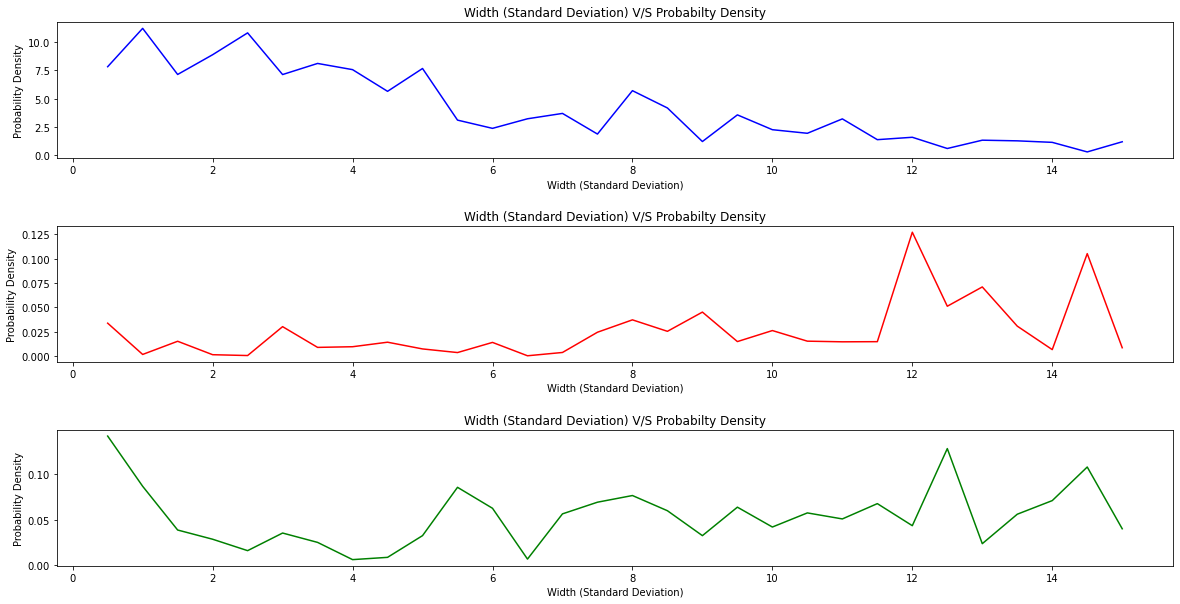

In [13]:
## Finds whether a Optimal Width exists wih respect to Convergence Time , Mean Difference and Standard Deviation Difference

fig , ax = plt.subplots(3)
mean_diff = {} ##Dictionary to store Proposal Width and its Mean Difference
convergetime = {} ##Dictionary to store Proposal Width and its Convergence Time
std_diff ={}##Dictionary to store Proposal Width and its Standard Devuation Difference

for i in range(1,31): ##Checks Proposal Width from 0.5 to 15 
    st = time.time() ##Stores the time at start
    proposal_posterior = mcmc(0,i*0.5,100) ##Approximates Posterior with Mean = 0 and Width = 0.5 * i and threshold = 100
    convergetime[0.5*i] = time.time() - st ##Stores Convergence Time taken
    mean_diff[0.5*i] = np.abs(np.mean(proposal_posterior) - mu_posterior) ##Calculates Difference between Mean of Analytical Posterior and Proposed Posterior
    std_diff[0.5*i] = np.abs(np.std(proposal_posterior) - std_posterior) ##Calculates Difference between Standard Deviation of Analytical Posterior and Proposed Posterior

##Plots Proposal Width and its Convergence Time
ax[0].plot(convergetime.keys(),convergetime.values(),label = 'Convergence Time' ,color = 'b')
ax[0].set_xlabel('Width (Standard Deviation)')
ax[0].set_ylabel('Probability Density')
ax[0].set_title('Width (Standard Deviation) V/S Probabilty Density')

##Plots Proposal Width and its Mean Difference
ax[1].plot(mean_diff.keys(),mean_diff.values(),label = 'Mean Difference' , color = 'r')
ax[1].set_xlabel('Width (Standard Deviation)')
ax[1].set_ylabel('Probability Density')
ax[1].set_title('Width (Standard Deviation) V/S Probabilty Density')

##Plots Proposal Width and its Standard Deviation Difference
ax[2].plot(std_diff.keys(),std_diff.values(),label = 'Standard Deviation Difference',color = 'g')
ax[2].set_xlabel('Width (Standard Deviation)')
ax[2].set_ylabel('Probability Density')
ax[2].set_title('Width (Standard Deviation) V/S Probabilty Density')

##Sorts the dictionary based on values and prints it
convergetime = {i[0] : i[1] for i in sorted(convergetime.items(), key=lambda x: x[1])}
print('Sorted Convergence Time : ')
for i , value in convergetime.items():
    print('Convergence Time for Width',i,'is',value)

##Sorts the dictionary based on values and prints it
mean_diff = {i[0]: i[1] for i in sorted(mean_diff.items(), key=lambda x: x[1])}
print('\n\nSorted Mean Difference : ')
for i , value in mean_diff.items():
    print('Mean Difference for Width',i,'is',value)

##Sorts the dictionary based on values and prints it
std_diff  = {i[0] : i[1] for i in sorted(std_diff.items(), key=lambda x: x[1])}
print('\n\nSorted Standard Deviation Difference')
for i , value in std_diff.items():
    print('Standard Deviation Difference for Width',i,'is',value)

plt.subplots_adjust(hspace = 0.5) ##Increase Horizontal Space between Subplots
plt.show()

## OBSERVATIONS

<ol>
    <li>It is generally observed that <b>Speed Of Convergence </b> is <b>Inversely Propotional</b> to <b>Proposal Width</b></li>
    <li>If we compare <b>Widths (Standard Deviation) </b> based on <b>Time Required To Converge</b> to choose a <b>Optimal Width </b> then it is observed that generally higher values of width in range of <b>11 to 15</b> perform <b>way better</b> than lower width values in range of <b>0 to 4</b> </li>
    <li>If we compare <b>Widths (Standard Deviation) </b> based on <b>Difference in Mean of Analytic Posterior and Proposed Posterior </b> to choose a <b>Optimal Width </b> then it is observed that generally  width in range of <b>4 to 9</b> perform <b>way better</b> than  width values in range of <b>12 to 15</b> </li>
      <li>If we compare <b>Widths (Standard Deviation) </b> based on <b>Difference in Standard Deviatipn of Analytic Posterior and Proposed Posterior </b> to choose a <b>Optimal Width </b> then it is observed that generally  width in range of <b>2 to 6</b> perform <b>way better</b> than  width values in range of <b>10 to 15</b> </li>
</ol>

## NOTE: 
### Above Observations are inferred by executing the code multiple times, it is possible  that in some run(s), above observations don't match the graphs, this is due to randomness introduced into the model due to random sampling

## Consequence of using  Sub-Optimal Proposal Width and Terminating Sampling  Early

### Taking Sub-Optimal Proposal Width based on Convergence Time

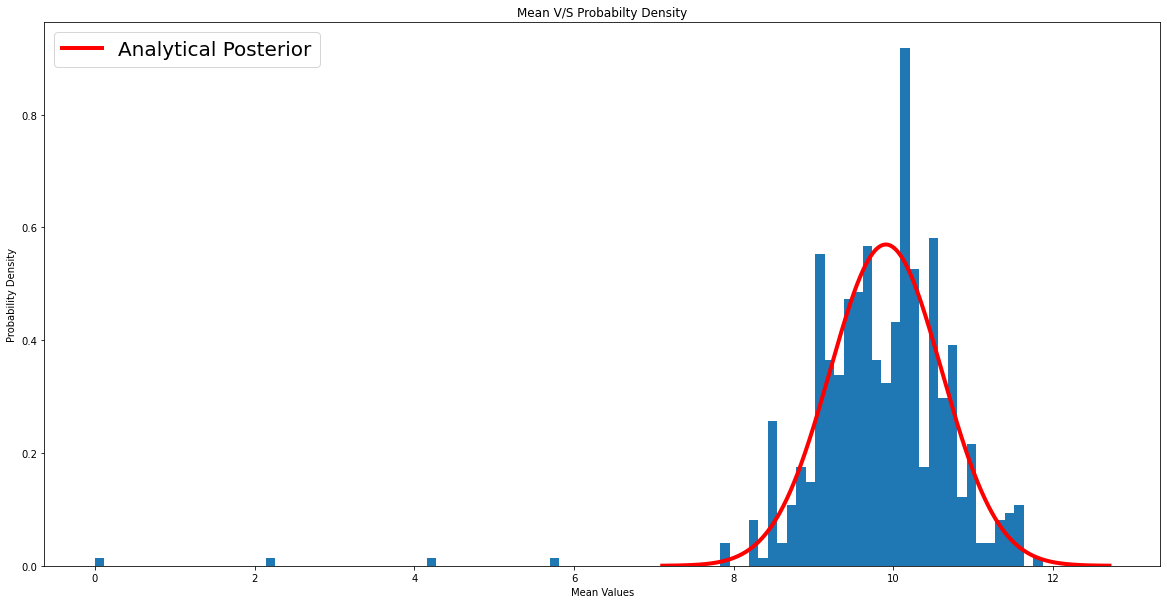

In [9]:

fig , ax = plt.subplots(1)
proposal_posterior = mcmc(0,list(convergetime.keys())[-1],5) ##Takes the Proposal Width which is in last position in dictionary to get worst proposal width

ax.hist(proposal_posterior,bins=100,density = True) 
ax.plot(mu_space3,posterior, color = 'r' , label = 'Analytical Posterior',linewidth = 4)
ax.legend(loc = 'upper left' ,prop = {'size' : 20})

ax.set_xlabel('Mean Values')
ax.set_ylabel('Probability Density')
ax.set_title('Mean V/S Probabilty Density')
print()

### Taking Sub-Optimal Proposal Width based on Mean Difference

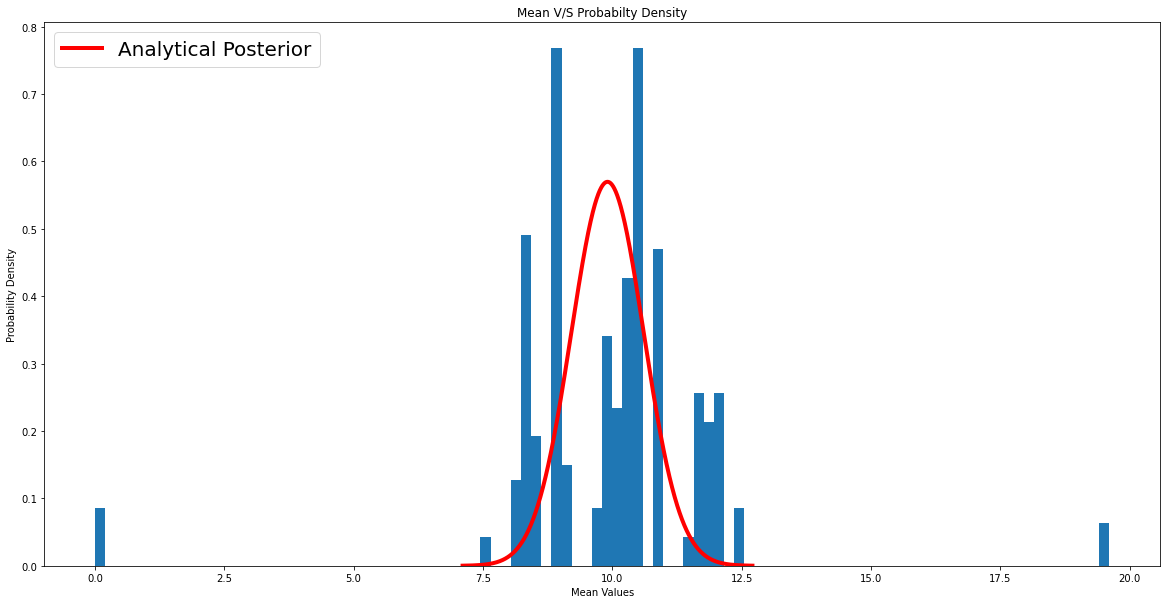

In [14]:
fig , ax = plt.subplots(1)
proposal_posterior = mcmc(0,list(mean_diff.keys())[-1],5)##Takes the Proposal Width which is in last position in dictionary to get worst proposal width

ax.hist(proposal_posterior,bins=100,density = True) ##Plots Histogram of Proposed Posterior and its density
ax.plot(mu_space3,posterior, color = 'r' , label = 'Analytical Posterior',linewidth = 4) ##Plots Analytical Posterior
ax.legend(loc = 'upper left' ,prop = {'size' : 20})

ax.set_xlabel('Mean Values')
ax.set_ylabel('Probability Density')
ax.set_title('Mean V/S Probabilty Density')
print()

### Taking Sub-Optimal Proposal Width based on Standard Deviation Difference

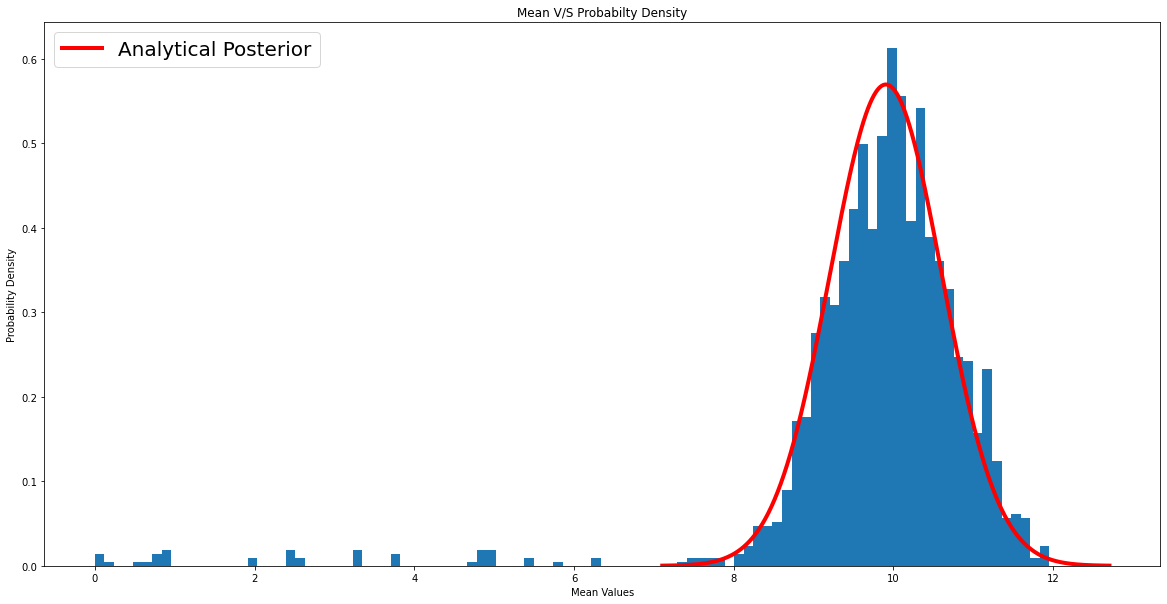

In [18]:
fig , ax = plt.subplots(1)
proposal_posterior = mcmc(0,list(std_diff.keys())[-1],5)##Takes the Proposal Width which is in last position in dictionary to get worst proposal width

ax.hist(proposal_posterior,bins=100,density = True) ##Plots Histogram of Proposed Posterior and its density
ax.plot(mu_space3,posterior, color = 'r' , label = 'Analytical Posterior',linewidth = 4) ##Plots Analytical Posterior
ax.legend(loc = 'upper left' ,prop = {'size' : 20})

ax.set_xlabel('Mean Values')
ax.set_ylabel('Probability Density')
ax.set_title('Mean V/S Probabilty Density')
print()